In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv(r"C:\Users\rakes\OneDrive\Desktop\course stuff\deep_learning\IRIS.csv")

In [3]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
spe=[]
for i in df['species']:
    if i=='Iris-setosa':
        spe.append(0)
    elif i=='Iris-versicolor':
        spe.append(1)
    elif i=='Iris-virginica':
        spe.append(2)
df['species']=spe

In [5]:
X = df.iloc[:,:4]
y = df['species']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, 
                                                    random_state = 0)

In [6]:
knn=KNeighborsClassifier()

In [7]:
param_to_be_tuned={'n_neighbors':[i for i in range(3,29,2)]} #tuning parameters grid

### *GridSearchCV using sklearn*

In [8]:
clf = GridSearchCV(
    estimator=KNeighborsClassifier(), 
    param_grid=param_to_be_tuned, 
    scoring='accuracy',
    cv=3,
    return_train_score=True,
    verbose=1
)

In [9]:
clf.fit(X_train,y_train)

Fitting 3 folds for each of 13 candidates, totalling 39 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [10]:
print(clf.best_params_)

{'n_neighbors': 7}


In [11]:
cv_results=pd.DataFrame(clf.cv_results_)

In [12]:
cv_results[['params','mean_train_score','mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'n_neighbors': 3},0.950000,0.941667
1,{'n_neighbors': 5},0.966667,0.958333
2,{'n_neighbors': 7},0.966667,0.966667
3,{'n_neighbors': 9},0.966667,0.966667
4,{'n_neighbors': 11},0.966667,0.958333
5,{'n_neighbors': 13},0.954167,0.958333
6,{'n_neighbors': 15},0.941667,0.941667
7,{'n_neighbors': 17},0.937500,0.941667
8,{'n_neighbors': 19},0.950000,0.933333
9,{'n_neighbors': 21},0.937500,0.941667


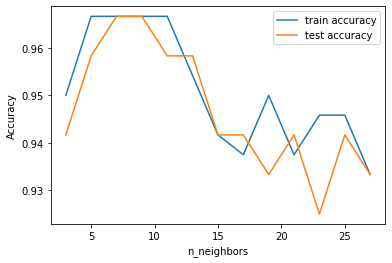

In [13]:
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')

### *GridsearchCV manual implementation*

In [14]:
param_to_be_tuned={'n_neighbors':[i for i in range(3,29,2)]} #tuning parameters grid

In [15]:
import random

In [16]:
X = df.iloc[:,:4].values
y = df['species'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, 
                                                    random_state = 0)

In [17]:
def select_60_per_indices_randomly(x_train):
    return random.sample([i for i in range(len(x_train))],int(0.6*(len(x_train))))

In [18]:
def grid_search(x_train,y_train,hyperparameter,folds,estimator):
    train_score=[]
    test_score=[]
    for k in hyperparameter['n_neighbors']:
        estimator.n_neighbors=k
        train_acc_per_each_fold=[]
        test_acc_per_each_fold=[]
        for fold in range(folds):
            train_indices=select_60_per_indices_randomly(x_train)
            cv_indices=list(set([i for i in range(len(x_train))])-set(train_indices))
            X_train_1=X_train[train_indices]
            y_train_1=y_train[train_indices]
            X_cv=X_train[cv_indices]
            y_cv=y_train[cv_indices]
            estimator.fit(X_train_1,y_train_1)
            y_cv_predict=estimator.predict(X_cv)
            y_train_pred=estimator.predict(X_train_1)
            test_acc_per_each_fold.append(accuracy_score(y_cv_predict,y_cv))
            train_acc_per_each_fold.append(accuracy_score(y_train_pred,y_train_1))
        train_score.append(np.mean(np.array(train_acc_per_each_fold)))
        test_score.append(np.mean(np.array(test_acc_per_each_fold)))
    return train_score,test_score

In [19]:
mean_train_score=grid_search(X_train,y_train,param_to_be_tuned,3,KNeighborsClassifier())[0]

In [20]:
mean_test_score=grid_search(X_train,y_train,param_to_be_tuned,3,KNeighborsClassifier())[1]

In [21]:
cv_res=pd.DataFrame()

In [22]:
cv_res['params']=param_to_be_tuned['n_neighbors']

In [23]:
cv_res['mean_train_score']=mean_train_score

In [24]:
cv_res['mean_test_score']=mean_test_score

In [25]:
cv_res

,params,mean_train_score,mean_test_score
0,3,0.953704,0.937500
1,5,0.935185,0.951389
2,7,0.953704,0.979167
3,9,0.958333,0.916667
4,11,0.976852,0.930556
5,13,0.953704,0.930556
6,15,0.953704,0.923611
7,17,0.962963,0.909722
8,19,0.953704,0.916667
9,21,0.949074,0.909722


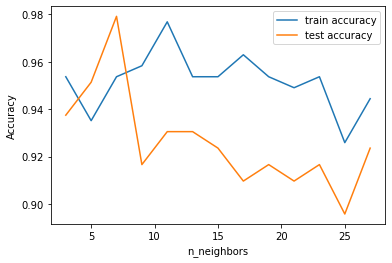

In [26]:
plt.plot(cv_res['params'], cv_res['mean_train_score'])
plt.plot(cv_res['params'], cv_res['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')

## *So, our best hyperparameter is k=7 from both the graphs*

In [27]:
knn.n_neighbors=7

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
y_test_predict=knn.predict(X_test)

In [30]:
accuracy_score(y_test_predict,y_test)

1.0

###  *as we trained, cross-validated our data and tuned the hyperparameter now we can test on test data and claim that our model is 100% accurate on future query points*